这个数据集，将肿瘤细胞分为两类，为良性肿瘤和恶性肿瘤，根据肿瘤细胞的外观特征以及细胞核的特征来划分的。这些特征有十个，分别为：

1.Sample code number id number（患者编号）
2. Clump Thickness 1 - 10（肿瘤厚度）
3. Uniformity of Cell Size 1 - 10 （细胞大小均匀性）
4. Uniformity of Cell Shape 1 - 10（细胞形状均匀性）
5. Marginal Adhesion 1 - 10（边缘粘附力）
6. Single Epithelial Cell Size 1 - 10（单上皮细胞大小）
7. Bare Nuclei 1 - 10（裸核）
8. Bland Chromatin 1 - 10（染色质的颜色）
9. Normal Nucleoli 1 - 10（核仁正常情况）
10. Mitoses 1 - 10（有丝分裂情况）

class是分类情况，2为良性，4为恶性

原文链接： https://blog.csdn.net/weixin_44615820/article/details/88841309

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.rcParams['font.sans-serif'] = ['simhei']
mpl.rcParams['font.serif'] = ['simhei']
plt.rc("font",family="SimHei",size="14") 
sns.set_style("darkgrid")

breast_pro=pd.read_csv("../data/breast-cancer.data")
breast_pro.columns=['code','clump-thickness','cell-size','cell-shape','adhesion','SE-CellSize','BareNuclei','BlandChromatin','NormalNucleoli','Mitoses','class']
breast_pro.head(10)
#cancer.info()

,code,clump-thickness,cell-size,cell-shape,adhesion,SE-CellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,class
0,1002945,5,4,4,5,7,10.0,3,2,1,2
1,1015425,3,1,1,1,2,2.0,3,1,1,2
2,1016277,6,8,8,1,3,4.0,3,7,1,2
3,1017023,4,1,1,3,2,1.0,3,1,1,2
4,1017122,8,10,10,8,7,10.0,9,7,1,4
5,1018099,1,1,1,1,2,10.0,3,1,1,2
6,1018561,2,1,2,1,2,1.0,3,1,1,2
7,1033078,2,1,1,1,2,1.0,1,1,5,2
8,1033078,4,2,1,1,2,1.0,2,1,1,2
9,1035283,1,1,1,1,1,1.0,3,1,1,2


In [7]:
breast_pro["BareNuclei"]=breast_pro["BareNuclei"].fillna(breast_pro["BareNuclei"].mean())

In [9]:
breast_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
code               698 non-null int64
clump-thickness    698 non-null int64
cell-size          698 non-null int64
cell-shape         698 non-null int64
adhesion           698 non-null int64
SE-CellSize        698 non-null int64
BareNuclei         698 non-null float64
BlandChromatin     698 non-null int64
NormalNucleoli     698 non-null int64
Mitoses            698 non-null int64
class              698 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


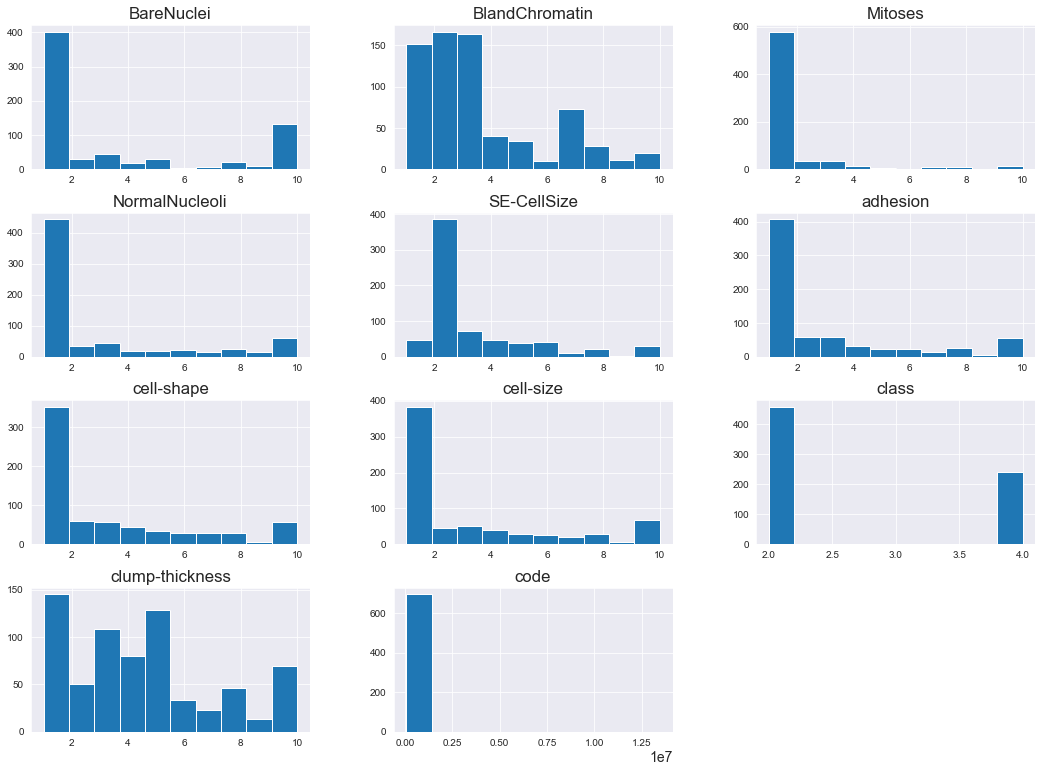

In [10]:
#直方图，分布情况：高斯分布还是指数分布还是偏态分布
breast_pro.hist(xlabelsize=10,ylabelsize=10,figsize=(18,13))
plt.show()

In [11]:
#将数据集拆分为训练集(X_train,y_train)和测试集(X_test,y_test)，用训练集训练模型后，用测试集来测试模型的性能。
from sklearn.model_selection import train_test_split

predictors=breast_pro.columns[:-1]
X_train,X_test,y_train,y_test=train_test_split(breast_pro[predictors],breast_pro['class'],test_size=0.3,random_state=1)

In [12]:
#决策树
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

#设置决策树的最大深度、最小非叶子节点的最小样本数和叶子节点的最小样本数的取值范围
max_depth=range(2,10,1) 
min_samples_split=range(2,12,1) 
min_samples_leaf=range(2,12,1) 
parameters_dtc={'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

#采用GridSearchCV选择最优的参数
grid_search=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=parameters_dtc,cv=10,n_jobs=-1) 
grid_search.fit(X_train,y_train) 
grid_search.best_params_

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 3}

In [13]:
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

#根据调参结果构建决策树 
dtc=DecisionTreeClassifier(max_depth=3,min_samples_split=7,min_samples_leaf=5) 
dtc.fit(X_train,y_train) 
y_predict=dtc.predict(X_test) 

print("决策树模型在测试集上的准确率为：",metrics.accuracy_score(y_test,y_predict))
###classification_report可以直接算出precision、recall和f1_score，就不用一个个的算啦
print(classification_report(y_true=y_test, y_pred=y_predict))

#print('Precision: ',metrics.precision_score(y_test,y_predict))
#print('Recall: ',recall_score(y_test,y_predict))
#print('F1:',f1_score(y_test,y_predict))

#保存决策树图像到pdf文件
#dot_data = export_graphviz(dtc,out_file=None,feature_names=predictors,class_names="class",filled=True, rounded=True,special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data)
#graph.write_pdf("breast_tree.pdf")

决策树模型在测试集上的准确率为： 0.9476190476190476
              precision    recall  f1-score   support

           2       0.95      0.97      0.96       142
           4       0.94      0.90      0.92        68

   micro avg       0.95      0.95      0.95       210
   macro avg       0.95      0.93      0.94       210
weighted avg       0.95      0.95      0.95       210



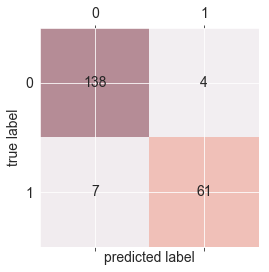

In [14]:
from sklearn.metrics import confusion_matrix

dtc_confmat = confusion_matrix(y_true=y_test, y_pred=y_predict)

fig, ax = plt.subplots(figsize=(4,4))
ax.matshow(dtc_confmat,alpha=0.4, cmap=plt.cm.Reds)
for i in range(dtc_confmat.shape[0]):
    for j in range(dtc_confmat.shape[1]):
        ax.text(x=j, y=i, s=dtc_confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
# plt.savefig('./figures/confusion_matrix.png', dpi=300)
plt.show()

In [15]:
from sklearn.metrics import roc_curve, auc

# y_test：实际的标签, dataset_pred：预测的概率值。
y_score=dtc.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test,y_score)
roc_auc = auc(fpr, tpr)  
#画图，只需要plt.plot(fpr,tpr),变量roc_auc只是记录auc的值，通过auc()函数能计算出来  
#画面积图
plt.stackplot(fpr,tpr,color='steelblue',alpha=0.3,edgecolor='black')
plt.plot(fpr, tpr, lw=1, label='ROC(area = %0.2f)' % (roc_auc))
#对角线
plt.plot([0,1],[0,1],color='r',linestyle='--',alpha=0.5)
plt.text(0.5,0.4,'ROC curve (area=%0.2f)'%roc_auc)
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.title("Receiver Operating Characteristic, ROC(AUC = %0.2f)"% (roc_auc))
plt.show()

ValueError: Data is not binary and pos_label is not specified